# EDA - Consolidación
## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

ruta_archivos = 'C:/Users/monic/documentos/ds4a/project/datos/'

In [2]:
# Bases
dcc = {
'ACT' : { 'id': 'ID', 'fecha': 'FE_RESULTADO', 'fecha_no_ok': False},
'ACT_DESAGREGADO' : { 'id': 'NUMERO IDENTIFICACION', 'fecha': 'FE_RESULTADO', 'fecha_no_ok': False},
'Adherencia' : { 'id': 'ds_identificacion', 'fecha': 'FE_ENTREVISTA', 'fecha_no_ok': False},
'Antecedentes_familiares' : { 'id': 'Id', 'fecha': 'FE_ALTA', 'fecha_no_ok': False},
'Antecedentes_patologicos' : { 'id': 'DS_IDENTIFICACION', 'fecha': 'FE_ACTUALIZA' , 'fecha_no_ok': False},
'Ayudas_diagnosticas' : { 'id': 'Numero_Identificacion', 'fecha': 'Fecha_Orden', 'fecha_no_ok': False},
'Biologicos Asma' : { 'id': 'Identificacion', 'fecha': 'Fecha_Dcto', 'fecha_no_ok': False},
'Calidad de vida relacioada en salud' : { 'id': 'Identificacion', 'fecha': 'FE_ALTA', 'fecha_no_ok': False},
#'Datos basicos' : { 'id': 'ID', 'fecha': '', 'fecha_no_ok': False},
'Disnea' : { 'id': 'id', 'fecha': 'FE_ALTA', 'fecha_no_ok': False},
'Farmacovigilancia RAM' : { 'id': 'NRO_IDENTIFICACION', 'fecha':'FECHA_NOTIFICACION' , 'fecha_no_ok': False},
'Habitos' : { 'id': 'DS_IDENTIFICACION', 'fecha': 'Fe_Registro', 'fecha_no_ok': False},
'Hospitalizaciones' : { 'id': 'Id', 'fecha': 'Fecha Ingreso', 'fecha_no_ok': False},
'Incosistencias en reclamacion' : { 'id':'IDENTIFICACIÓN' , 'fecha':'FE_REGISTRO' , 'fecha_no_ok': True, 'formato_fecha': '%Y-%m-%d'},
'Medicamentos' : { 'id':'Id' , 'fecha': 'Fecha_Emision', 'fecha_no_ok': False},
'Mediciones de peso y talla' : { 'id':'DS_IDENTIFICACION' , 'fecha': 'FE_alta' , 'fecha_no_ok': False},
'Urgencias' : { 'id':'Numero_Identificacion' , 'fecha':'Fecha_Emision' , 'fecha_no_ok': False},
'Vacunacion' : { 'id':'Numero_de_documento' , 'fecha':'Fecha_Emision' , 'fecha_no_ok': False}
}


In [3]:
# Base de ids
ids = pd.read_excel( ruta_archivos + 'Datos basicos.xlsx')
ids = ids.groupby('ID')['edad'].count().reset_index(name='cuenta')#.sort_values('cuenta', ascending = False)
ids.head()

,ID,cuenta
0,500547,1
1,500588,1
2,502989,1
3,506808,1
4,512938,1


In [4]:
df = pd.DataFrame({'tabla' : [], 'year' : [], 'cuenta': []})
for k in dcc :
    
    # Lectura de la base
    base = pd.read_excel( ruta_archivos + k + '.xlsx')
    
    # Seleccion de columnas y transformacion
    c_fecha = dcc[k]['fecha']
    if dcc[k]['fecha_no_ok'] :
        base[ c_fecha ] = base[ c_fecha ].apply( lambda x : datetime.datetime.strptime(str(x), dcc[k]['formato_fecha']))
    
    base['year'] = base[ c_fecha ].apply( lambda x : x.year )
    base['yearmonth'] = base[ c_fecha ].apply( lambda x : x.year + 100 + x.month )
    base = base[[dcc[k]['id'], 'year', 'yearmonth']]
    base['dumm'] = 1
    base.columns = ['id', 'year', 'yearmonth', 'dumm']
    
    # Agrupación para tener ids unicos
    base_g = base.groupby(['id', 'year'])['dumm'].count().reset_index(name='cuenta')
    
    # Cruce con base de demográficos
    base_c = base_g.merge( ids, how = 'inner', left_on = 'id', right_on = 'ID' )
    
    # group by por año
    bk = base_c.groupby(['year'])['id'].count().reset_index(name='cuenta')
    bk['tabla'] = k
    df = df.append( bk )
    
    
    
    print( k + '|' + str(base_g.shape[0]) + '|' + str(base_c.shape[0]) )


ACT|1105|1105
ACT_DESAGREGADO|1109|1109
Adherencia|2798|2798
Antecedentes_familiares|53|53
Antecedentes_patologicos|1198|1198
Ayudas_diagnosticas|1951|1317
Biologicos Asma|1833|1833
Calidad de vida relacioada en salud|193|193
Disnea|81|81
Farmacovigilancia RAM|257|257
Habitos|766|766
Hospitalizaciones|847|847
Incosistencias en reclamacion|2148|2148
Medicamentos|3805|3370
Mediciones de peso y talla|1986|1986
Urgencias|1097|1097
Vacunacion|210|210


In [5]:
df.head()

,tabla,year,cuenta
0,ACT,2014.0,74.0
1,ACT,2015.0,161.0
2,ACT,2016.0,195.0
3,ACT,2017.0,135.0
4,ACT,2018.0,303.0


In [5]:
df['year'] = df['year'].astype('int')

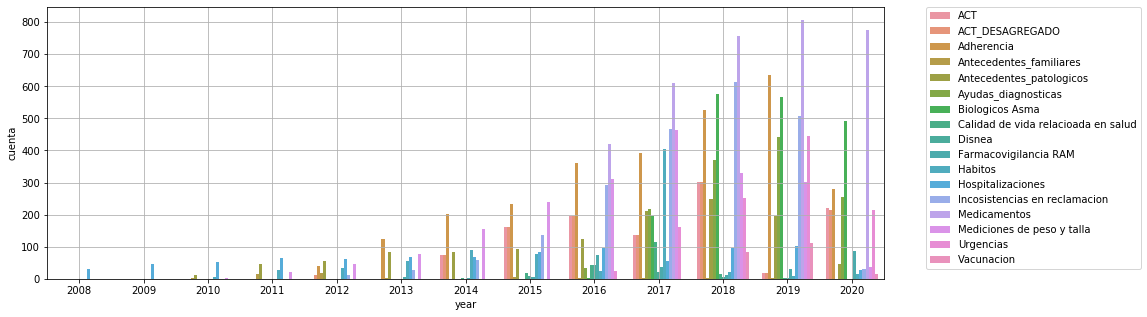

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='year', y='cuenta', hue='tabla', data=df)

_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)

In [7]:
df_2016 = df[df['year']>=2016]

df_2016_ag = df_2016.groupby('tabla')['cuenta'].sum().reset_index(name='total')
df_2016 = df_2016.merge( df_2016_ag )
df_2016 = df_2016.reset_index()
df_2016['cuenta_p'] = df_2016.apply( lambda x : round(x['cuenta']/x['total']*100,0), axis = 1)

In [8]:
df_2016 = df_2016[['tabla','year','cuenta','total','cuenta_p']]
df_2016

,tabla,year,cuenta,total,cuenta_p
0,ACT,2016,195.0,870.0,22.0
1,ACT,2017,135.0,870.0,16.0
2,ACT,2018,303.0,870.0,35.0
3,ACT,2019,17.0,870.0,2.0
4,ACT,2020,220.0,870.0,25.0
...,...,...,...,...,...
75,Urgencias,2019,446.0,1097.0,41.0
76,Urgencias,2020,215.0,1097.0,20.0
77,Vacunacion,2018,85.0,210.0,40.0
78,Vacunacion,2019,111.0,210.0,53.0


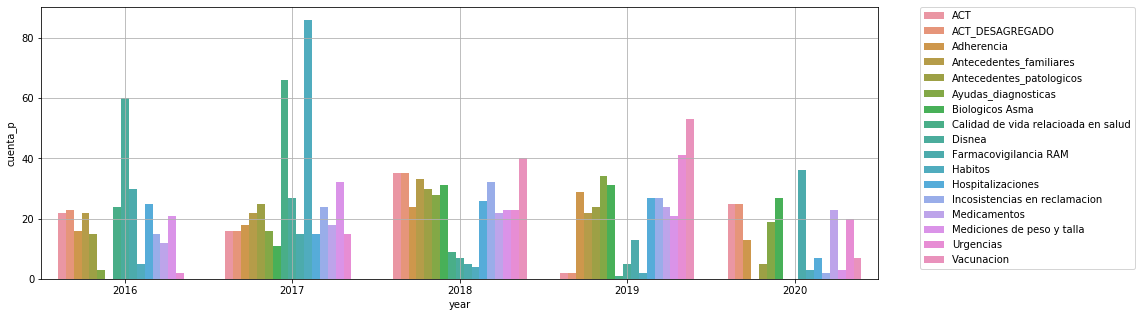

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='year', y='cuenta_p', hue='tabla', data=df_2016)

#_ = plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)

In [12]:
df_2016.pivot(index='tabla', columns='year', values='cuenta_p')

year,2016,2017,2018,2019,2020
tabla,,,,,
ACT,22.0,16.0,35.0,2.0,25.0
ACT_DESAGREGADO,23.0,16.0,35.0,2.0,25.0
Adherencia,16.0,18.0,24.0,29.0,13.0
Antecedentes_familiares,22.0,22.0,33.0,22.0,NaN
Antecedentes_patologicos,15.0,25.0,30.0,24.0,5.0
Ayudas_diagnosticas,3.0,16.0,28.0,34.0,19.0
Biologicos Asma,0.0,11.0,31.0,31.0,27.0
Calidad de vida relacioada en salud,24.0,66.0,9.0,1.0,NaN
Disnea,60.0,27.0,7.0,5.0,NaN
